### Identifying Fraudulent Activities

Company XYZ is an e-commerce site that sells hand-made clothes.
You have to build a model that predicts whether a user has a high probability of using the site to
perform some illegal activity or not. This is a super common task for data scientists.
You only have information about the user first transaction on the site and based on that you
have to make your classification ("fraud/no fraud").

### Load all the required libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cross_validation import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib inline

### Load Fraud_data and IpAddress_to_Country dataset

In [3]:
fraud_data=pd.read_csv("...../Fraud/Fraud_Data.csv")
ip_address=pd.read_csv("...../Fraud/IpAddress_to_Country.csv")
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip_address.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Comparing both the tables

In [5]:
len(fraud_data) == len(ip_address)

False

In [6]:
fraud_data.shape

(151112, 11)

In [7]:
ip_address.shape

(138846, 3)

In [8]:
country = len(fraud_data) * [0]

for ind, row in fraud_data.iterrows():
    temp = ip_address[(ip_address['lower_bound_ip_address'] < row['ip_address']) & 
           (ip_address['upper_bound_ip_address'] > row['ip_address'])]['country']
    
    if len(temp) == 1:
        country[ind] = temp.values[0]

fraud_data['country'] = country

In [9]:
fraud_data.to_csv('DF_Data.csv')

In [10]:
data = pd.read_csv('DF_Data.csv')
data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


Remove the column Unnamed: 0 from the data

In [11]:
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [13]:
data.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
country            object
dtype: object

Let's check how the values of each attributes are distributed by using describe function which summarizes the data

In [14]:
data.describe().transpose

<bound method DataFrame.transpose of              user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  >

The averge purchase value is around 36 with the median around 35.Purchase value is pretty evenly distributed.
Minimum age as entered by the user is 18 with a max of 76 and an average 33 and median of 33. 

#### Converting signup time and purchase time to datetime objects


In [15]:
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])

In [16]:
data['source'].describe()

count     151112
unique         3
top          SEO
freq       60615
Name: source, dtype: object

In [17]:
data['country'].describe()

count            151112
unique              182
top       United States
freq              58049
Name: country, dtype: object

#### Difference between signup time and purchase time

In [18]:
data['diff_time'] = (data['purchase_time'] - data['signup_time'])/np.timedelta64(1, 's')

#### Different user id's using the same device

In [19]:
device_user_count = len(data) * [0]
device_count = data.groupby('device_id')['user_id'].count()
device_user_count = device_count[data['device_id']]
device_user_count = device_user_count.reset_index().drop('device_id', axis = 1)
device_user_count.columns = ['device_user_count']

In [20]:
data = pd.concat([data, device_user_count], axis = 1)

#### Number of users' using a given ip address

In [21]:
ip_count = data.groupby('ip_address')['user_id'].count()
ip_count = ip_count[data['ip_address']].reset_index().drop('ip_address', axis = 1)
ip_count.columns = ['ip_count']
data = pd.concat([data, ip_count], axis = 1)

#### Let's keep only the top 50 countries by replacing everything else with 'Other'

In [22]:
temp = data.groupby('country')[['user_id']].count().sort_values('user_id', ascending = False)
temp = temp.iloc[:50,:].loc[data['country']].reset_index()
temp.loc[temp.isnull().any(axis = 1), 'country'] = 'other'
temp.loc[temp['country'] == '0','country'] = 'other'
temp = temp.drop('user_id', axis = 1)
temp.columns = ['country_revised']
data = pd.concat([data, temp], axis = 1)
data = data.drop('country', axis = 1)

In [23]:
data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,diff_time,device_user_count,ip_count,country_revised
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0,12,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0,1,1,other
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0,1,1,United States


### Machine -Learning Model

#### Response Variable

In [24]:
y = data['class']

#### Predictors

In [25]:
data = data.drop(['user_id', 'signup_time','purchase_time','class'], axis = 1)

In [26]:
X = data

I would like to know if some values are missing by using isnull function

In [27]:
X.isnull().sum()

purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
diff_time            0
device_user_count    0
ip_count             0
country_revised      0
dtype: int64

#### Label Encoding string variables
Encode labels with value between 0 and n_classes-1.

In [28]:
lb = LabelEncoder()
X['device_id'] = lb.fit_transform(X['device_id'])
X['source'] = lb.fit_transform(X['source'])
X['browser'] = lb.fit_transform(X['browser'])
X['sex'] = lb.fit_transform(X['sex'])
X['country_revised'] = lb.fit_transform(X['country_revised'])

### Splitting data into train and test dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Random forest
Creating a pipeline

In [30]:
pipeline = Pipeline(steps = [('clf', RandomForestClassifier(criterion = 'entropy'))])

In [31]:
clf_forest = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 50, min_samples_leaf= 3,min_samples_split= 3, oob_score= True)

In [32]:
clf_forest.fit(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [33]:
preds = clf_forest.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test, preds))
           

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     34345
          1       0.98      0.55      0.70      3433

avg / total       0.96      0.96      0.95     37778



we are able to predict fraud with a precision of 98% and a recall of 54%. 

In [35]:
# Variable importance
clf_forest.feature_importances_

array([ 0.06057004,  0.07762714,  0.00974221,  0.01863199,  0.00822536,
        0.05096925,  0.07848437,  0.30767461,  0.19270406,  0.16554082,
        0.02983014])

In [36]:
# Features used are 
data.columns.values[:-1]

array(['purchase_value', 'device_id', 'source', 'browser', 'sex', 'age',
       'ip_address', 'diff_time', 'device_user_count', 'ip_count'], dtype=object)

In [37]:
# out of box score
clf_forest.oob_score_

0.954259092593573

In [38]:
prob_score = clf_forest.predict_proba(X_test)
prob_score = DataFrame(prob_score).iloc[:,0]

In [39]:
fpr,tpr,thresholds = roc_curve(y_test,1-prob_score)

#### Plotting the ROC curve

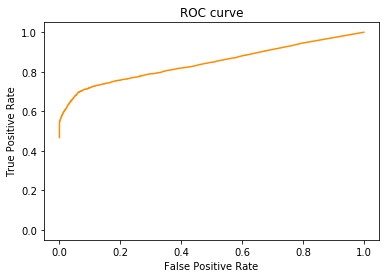

In [40]:
plt.plot(fpr,tpr, color = 'darkorange')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [41]:
tpr

array([ 0.46752112,  0.46897757,  0.46956015, ...,  0.94290708,
        0.94290708,  1.        ])

In [42]:
fpr

array([ 0.        ,  0.        ,  0.        , ...,  0.79094482,
        0.79106129,  1.        ])

In [43]:
thresholds

array([  1.00000000e+00,   9.97619048e-01,   9.96875000e-01, ...,
         5.49450549e-04,   3.59712230e-04,   0.00000000e+00])

#### ROC Analysis

In [44]:
i = np.arange(len(fpr))
roc = DataFrame({'fpr' : Series(fpr, index=i),'tpr' : Series(tpr, index = i), '1-fpr' : Series(1-fpr, index = i), 
                    'tf' : Series(tpr - (1-fpr), index = i), 'thresholds' : Series(thresholds, index = i)})
roc.iloc[(roc['tf']-0).abs().argsort()[[0]]]

,1-fpr,fpr,tf,thresholds,tpr
2233,0.768147,0.231853,-0.000888,0.058393,0.767259


The optimal cut off point can be deduced to be 0.06. The TPR at the threshold is 76%. The FPR at threshold is 23%

[]

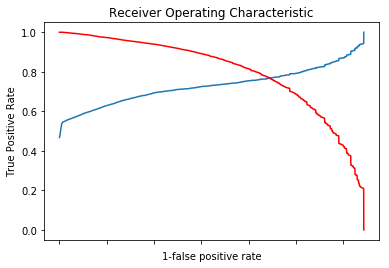

In [45]:
fig, ax = plt.subplots(1)
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-false positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
ax.set_xticklabels([])

Rebuilding the random forest model with some correction

In [46]:
prob = clf_forest.predict_proba(X_test)[:,1]
prob[prob > 0.06] = 1
prob[prob <= 0.06] = 0

In [47]:
prob

array([ 0.,  1.,  0., ...,  0.,  0.,  1.])

In [48]:
print(classification_report(y_test, prob))


             precision    recall  f1-score   support

          0       0.97      0.78      0.86     34345
          1       0.25      0.76      0.38      3433

avg / total       0.91      0.77      0.82     37778



precision has come down to 26% whereas recall/sensitivity has gone up to 77% from 56% in the previous model